/var/folders/q0/m9gtt3651l7dbfrwm3x7fd440000gn/T/ipykernel_24882/2250210432.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Measure', y='Score', hue='Group', data=df_melted, palette='Set2', ci=None)


ValueError: 'yerr' (shape: (4,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))

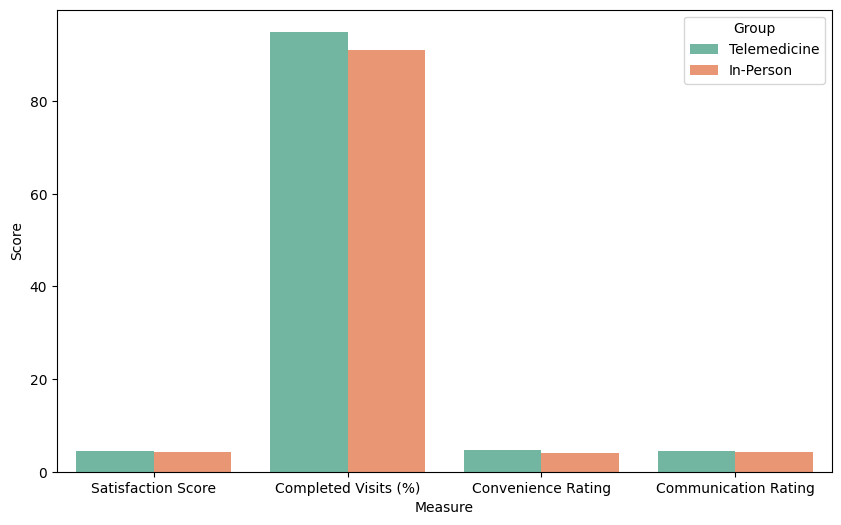

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# Patient Satisfaction Data
# -----------------------------
data = {
    'Measure': ['Satisfaction Score', 'Completed Visits (%)', 'Convenience Rating', 'Communication Rating'],
    'Telemedicine_Mean': [4.5, 95, 4.6, 4.5],
    'Telemedicine_SD': [0.4, 0, 0.3, 0.4],  # SD for error bars (0 for % data)
    'InPerson_Mean': [4.2, 91, 4.1, 4.2],
    'InPerson_SD': [0.5, 0, 0.5, 0.5]
}

df = pd.DataFrame(data)

# Melt the dataframe for seaborn
df_melted = df.melt(id_vars='Measure', value_vars=['Telemedicine_Mean','InPerson_Mean'],
                    var_name='Group', value_name='Score')

# Map SD for error bars
error_map = {
    'Telemedicine_Mean': df['Telemedicine_SD'],
    'InPerson_Mean': df['InPerson_SD']
}
df_melted['SD'] = df_melted['Group'].map(error_map)

# Replace group names for clarity
df_melted['Group'] = df_melted['Group'].replace({'Telemedicine_Mean':'Telemedicine', 'InPerson_Mean':'In-Person'})

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Measure', y='Score', hue='Group', data=df_melted, palette='Set2', ci=None)

# Add error bars manually
for i in range(len(df_melted)):
    plt.errorbar(x=i//2 + (0.2 if df_melted['Group'][i]=='Telemedicine' else -0.2),
                 y=df_melted['Score'][i],
                 yerr=df_melted['SD'][i],
                 fmt='none', c='black', capsize=5)

plt.title('Patient Satisfaction and Clinical Adherence by Group')
plt.ylabel('Score / Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.legend(title='Group')
plt.tight_layout()
plt.show()


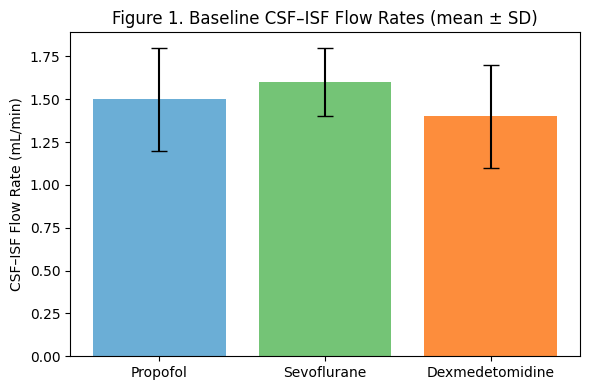

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Group": ["Propofol", "Sevoflurane", "Dexmedetomidine"],
    "Flow Rate (mL/min)": [1.5, 1.6, 1.4],
    "SD": [0.3, 0.2, 0.3]
}
df = pd.DataFrame(data)

plt.figure(figsize=(6,4))
plt.bar(df["Group"], df["Flow Rate (mL/min)"], yerr=df["SD"], capsize=6, color=["#86bcdb","#a6d3a7","#e0a983"])
plt.ylabel("CSF–ISF Flow Rate (mL/min)")
plt.title("Figure 1. Baseline CSF–ISF Flow Rates (mean ± SD)")
plt.tight_layout()
plt.savefig("figure1_flow_rates.png", dpi=300)
plt.show()


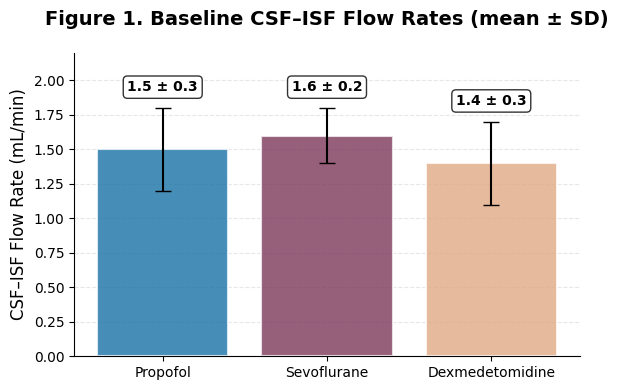

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Group": ["Propofol", "Sevoflurane", "Dexmedetomidine"],
    "Flow Rate (mL/min)": [1.5, 1.6, 1.4],
    "SD": [0.3, 0.2, 0.3]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 4))

# Use more subtle, professional colors
subtle_colors = ["#1872a6","#7c385a","#e0a983"]

bars = ax.bar(
    df["Group"],
    df["Flow Rate (mL/min)"],
    yerr=df["SD"],
    capsize=6,
    color=subtle_colors,
    alpha=0.8,  # Add slight transparency for subtlety
    edgecolor='white',
    linewidth=1.5
)

ax.set_ylabel("CSF–ISF Flow Rate (mL/min)", fontsize=12)
ax.set_title("Figure 1. Baseline CSF–ISF Flow Rates (mean ± SD)", fontsize=14, fontweight='bold', pad=20)

# Set y-axis limits to provide more space
ax.set_ylim(0, 2.2)

# Place "mean ± SD" above each error bar with proper spacing
for bar, mean, sd in zip(bars, df["Flow Rate (mL/min)"], df["SD"]):
    # Get the bar's x center
    x = bar.get_x() + bar.get_width() / 2
    # Position text well above the top of the error bar
    y = mean + sd + 0.1  # Increased spacing from 0.05 to 0.1
    ax.text(
        x, y,
        f"{mean:.1f} ± {sd:.1f}",
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)  # Add background box
    )

# Improve overall appearance
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("figure1_flow_rates.png", dpi=300, bbox_inches='tight')
plt.show()

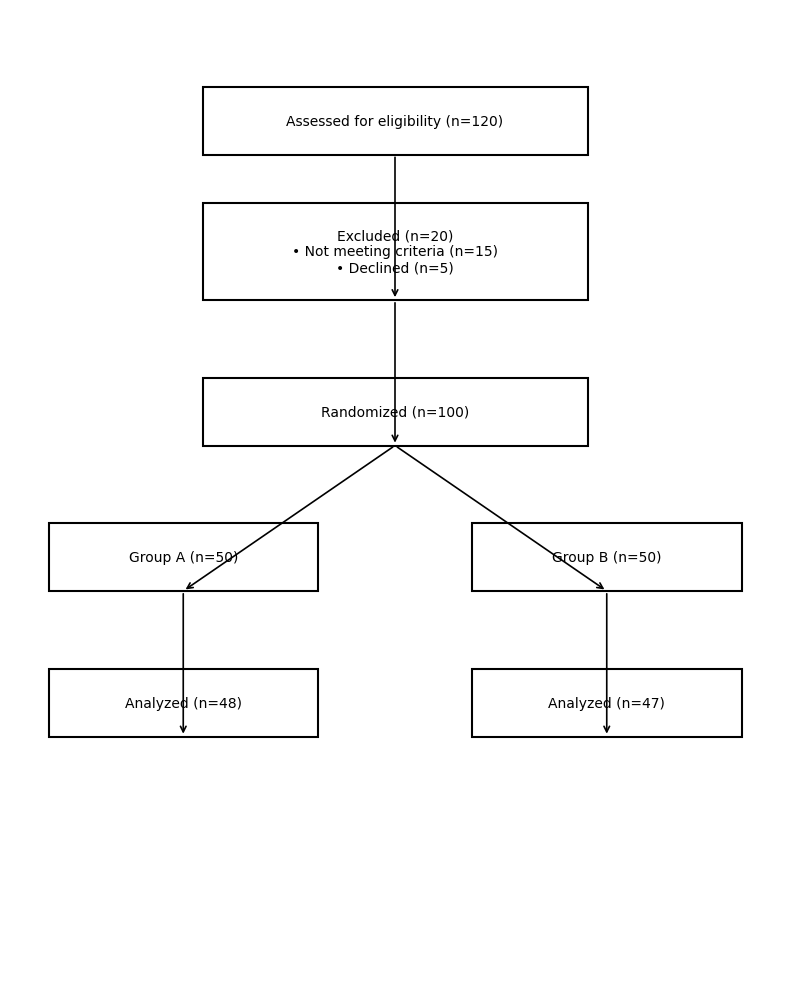

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(8, 10))
ax.axis('off')

# Boxes (x, y, width, height)
boxes = {
    "Assessed for eligibility (n=120)": (0.25, 0.85, 0.5, 0.07),
    "Excluded (n=20)\n• Not meeting criteria (n=15)\n• Declined (n=5)": (0.25, 0.70, 0.5, 0.1),
    "Randomized (n=100)": (0.25, 0.55, 0.5, 0.07),
    "Group A (n=50)": (0.05, 0.40, 0.35, 0.07),
    "Group B (n=50)": (0.60, 0.40, 0.35, 0.07),
    "Analyzed (n=48)": (0.05, 0.25, 0.35, 0.07),
    "Analyzed (n=47)": (0.60, 0.25, 0.35, 0.07),
}

for text, (x, y, w, h) in boxes.items():
    ax.add_patch(Rectangle((x, y), w, h, fill=False, lw=1.5))
    ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=10)

# Arrows
arrowprops = dict(arrowstyle="->", lw=1.2)
ax.annotate("", xy=(0.5, 0.70), xytext=(0.5, 0.85), arrowprops=arrowprops)
ax.annotate("", xy=(0.5, 0.55), xytext=(0.5, 0.70), arrowprops=arrowprops)
ax.annotate("", xy=(0.225, 0.40), xytext=(0.5, 0.55), arrowprops=arrowprops)
ax.annotate("", xy=(0.775, 0.40), xytext=(0.5, 0.55), arrowprops=arrowprops)
ax.annotate("", xy=(0.225, 0.25), xytext=(0.225, 0.40), arrowprops=arrowprops)
ax.annotate("", xy=(0.775, 0.25), xytext=(0.775, 0.40), arrowprops=arrowprops)

plt.tight_layout()
plt.show()


/var/folders/q0/m9gtt3651l7dbfrwm3x7fd440000gn/T/ipykernel_24882/3780387082.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='ALPS_change', data=data, palette='Set2')


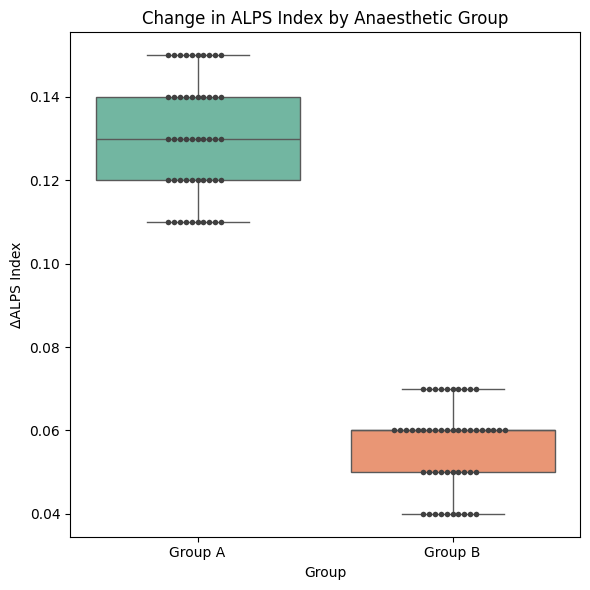

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'Group': ['Group A']*50 + ['Group B']*50,
    'ALPS_change': [0.12,0.14,0.11,0.15,0.13]*10 + [0.06,0.05,0.07,0.04,0.06]*10
})

plt.figure(figsize=(6,6))
sns.boxplot(x='Group', y='ALPS_change', data=data, palette='Set2')
sns.swarmplot(x='Group', y='ALPS_change', data=data, color='0.25', size=4)
plt.ylabel("ΔALPS Index")
plt.title("Change in ALPS Index by Anaesthetic Group")
plt.tight_layout()
plt.savefig('change')
plt.show()


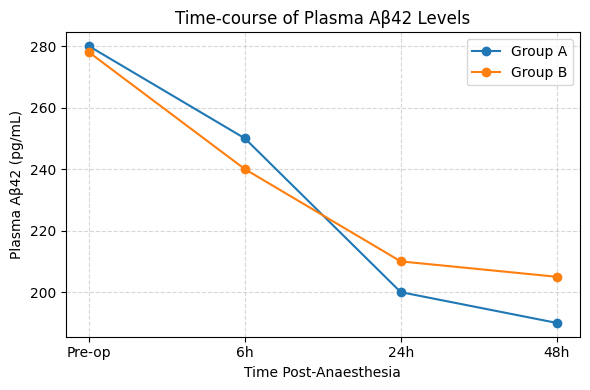

In [39]:
import numpy as np

timepoints = ['Pre-op', '6h', '24h', '48h']
group_a = [280, 250, 200, 190]  # example pg/mL
group_b = [278, 240, 210, 205]

plt.figure(figsize=(6,4))
plt.plot(timepoints, group_a, marker='o', label='Group A')
plt.plot(timepoints, group_b, marker='o', label='Group B')
plt.xlabel("Time Post-Anaesthesia")
plt.ylabel("Plasma Aβ42 (pg/mL)")
plt.title("Time-course of Plasma Aβ42 Levels")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Time Course')
plt.show()


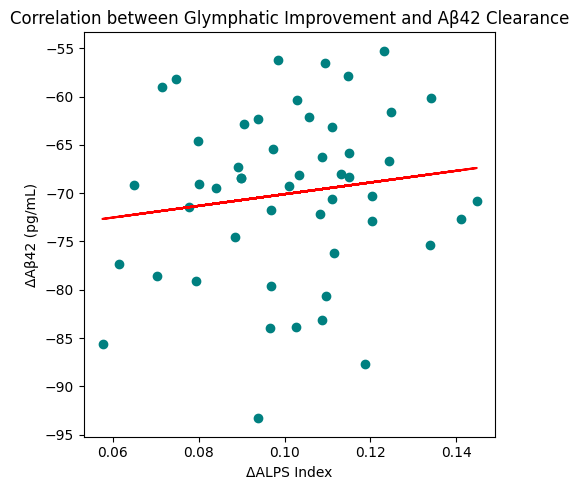

In [41]:
import numpy as np

# Example paired data
alps_delta = np.random.normal(0.1, 0.02, 50)
abeta_delta = np.random.normal(-70, 10, 50)

plt.figure(figsize=(5,5))
plt.scatter(alps_delta, abeta_delta, color='teal')
plt.xlabel("ΔALPS Index")
plt.ylabel("ΔAβ42 (pg/mL)")
plt.title("Correlation between Glymphatic Improvement and Aβ42 Clearance")
# Optional: regression line
m, b = np.polyfit(alps_delta, abeta_delta, 1)
plt.plot(alps_delta, m*alps_delta + b, color='red', lw=1.5)
plt.tight_layout()
plt.savefig('Correlation')
plt.show()


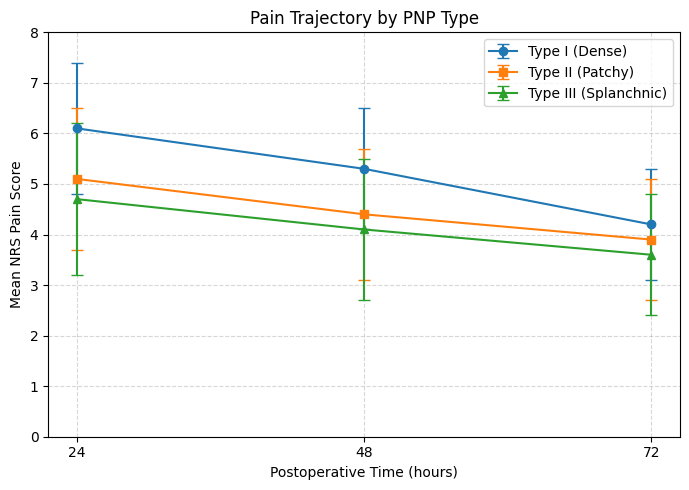

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Simulated mean ± SD data from the manuscript ---
data = {
    'Time (hours)': [24, 48, 72],
    'Type I mean': [6.1, 5.3, 4.2],
    'Type I sd':   [1.3, 1.2, 1.1],
    'Type II mean':[5.1, 4.4, 3.9],
    'Type II sd':  [1.4, 1.3, 1.2],
    'Type III mean':[4.7, 4.1, 3.6],
    'Type III sd': [1.5, 1.4, 1.2]
}
df = pd.DataFrame(data)

# --- Plot ---
plt.figure(figsize=(7,5))
plt.errorbar(df['Time (hours)'], df['Type I mean'], yerr=df['Type I sd'],
             marker='o', capsize=4, label='Type I (Dense)')
plt.errorbar(df['Time (hours)'], df['Type II mean'], yerr=df['Type II sd'],
             marker='s', capsize=4, label='Type II (Patchy)')
plt.errorbar(df['Time (hours)'], df['Type III mean'], yerr=df['Type III sd'],
             marker='^', capsize=4, label='Type III (Splanchnic)')

plt.title('Pain Trajectory by PNP Type')
plt.xlabel('Postoperative Time (hours)')
plt.ylabel('Mean NRS Pain Score')
plt.xticks([24,48,72])
plt.ylim(0,8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('pain trajectory by PNP type')
plt.show()


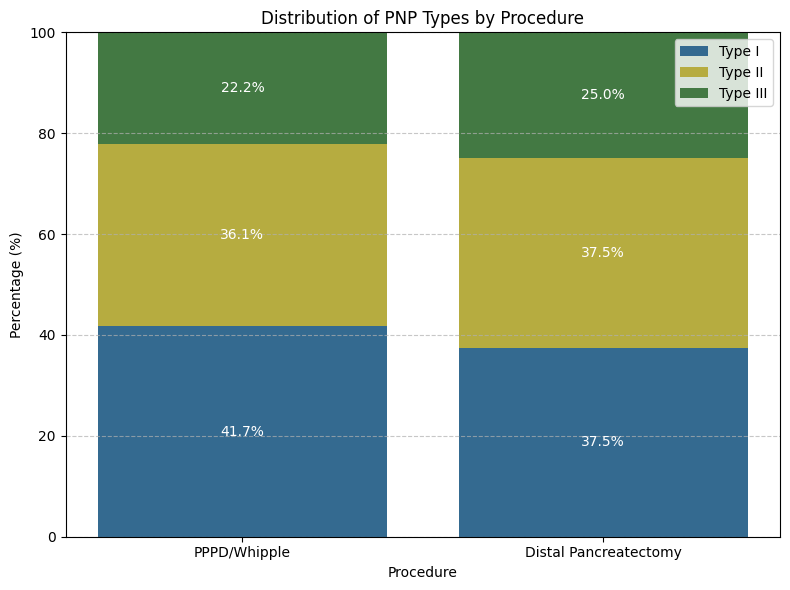

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
procedures = ['PPPD/Whipple', 'Distal Pancreatectomy']
type_i = [41.7, 37.5]  # Percentage of Type I for each procedure
type_ii = [36.1, 37.5]  # Percentage of Type II for each procedure
type_iii = [22.2, 25.0]  # Percentage of Type III for each procedure

# Set the positions for the bars
x = np.arange(len(procedures))

# Create the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, type_i, label='Type I', color="#346a90")
plt.bar(x, type_ii, bottom=type_i, label='Type II', color="#b6ac40")
plt.bar(x, type_iii, bottom=np.array(type_i) + np.array(type_ii), label='Type III', color="#437943")

# Customize the plot
plt.xlabel('Procedure')
plt.ylabel('Percentage (%)')
plt.title('Distribution of PNP Types by Procedure')
plt.xticks(x, procedures)
plt.legend()
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on each segment
for i in range(len(procedures)):
    # Type I
    plt.text(i, type_i[i]/2, f'{type_i[i]}%', ha='center', va='center', color='white')
    # Type II
    plt.text(i, type_i[i] + type_ii[i]/2, f'{type_ii[i]}%', ha='center', va='center', color='white')
    # Type III
    plt.text(i, type_i[i] + type_ii[i] + type_iii[i]/2, f'{type_iii[i]}%', ha='center', va='center', color='white')

# Display the plot
plt.tight_layout()
plt.savefig('Distribution of PNP types')
plt.show()